<a href="https://colab.research.google.com/github/Ares1510/Learning-TensorFlow/blob/master/CIFAR10_VGG_Style_3_Blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [0]:
cf10 = keras.datasets.cifar10

In [3]:
(x_train,y_train), (x_test, y_test) = cf10.load_data()

170500096/170498071 [==============================] - 13s 0us/step


In [0]:
x_train, x_test = x_train / 255., x_test / 255.

In [0]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer='he_uniform'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [12]:
history = model.fit(x_train, y_train, epochs=10, batch_size=15, validation_data=(x_test,y_test))

Epoch 1/10
3334/3334 [==============================] - 16s 5ms/step - loss: 1.3021 - sparse_categorical_accuracy: 0.5334 - val_loss: 1.0387 - val_sparse_categorical_accuracy: 0.6289
Epoch 2/10
3334/3334 [==============================] - 16s 5ms/step - loss: 0.8758 - sparse_categorical_accuracy: 0.6975 - val_loss: 0.8625 - val_sparse_categorical_accuracy: 0.7052
Epoch 3/10
3334/3334 [==============================] - 16s 5ms/step - loss: 0.7074 - sparse_categorical_accuracy: 0.7523 - val_loss: 0.7827 - val_sparse_categorical_accuracy: 0.7271
Epoch 4/10
3334/3334 [==============================] - 16s 5ms/step - loss: 0.5896 - sparse_categorical_accuracy: 0.7937 - val_loss: 0.7992 - val_sparse_categorical_accuracy: 0.7352
Epoch 5/10
3334/3334 [==============================] - 16s 5ms/step - loss: 0.4906 - sparse_categorical_accuracy: 0.8283 - val_loss: 0.7984 - val_sparse_categorical_accuracy: 0.7473
Epoch 6/10
3334/3334 [==============================] - 16s 5ms/step - loss: 0.4065 -

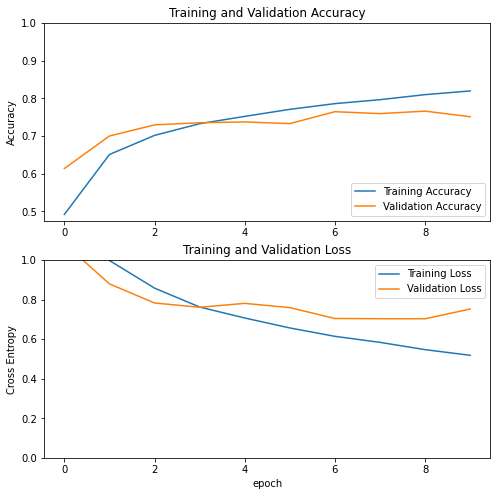

In [9]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()